In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv file
wn= pd.read_csv('wine.csv')
wn.sample(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
140,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
148,3,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
74,2,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
124,2,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380
91,2,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450


In [3]:
# checking shape
wn.shape

(178, 14)

In [4]:
# checking data type
wn.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object

In [5]:
# checking the data description
wn.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# checking null value
wn.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

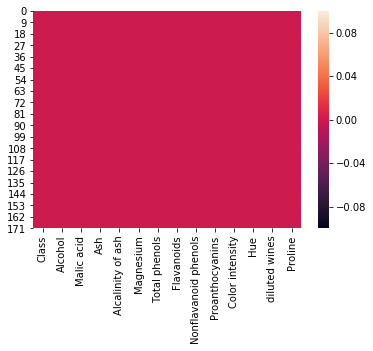

In [7]:
# heatmap of null value
sns.heatmap(wn.isnull())

In [8]:
wn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
diluted wines           178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
# corelation between coloums
wn.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


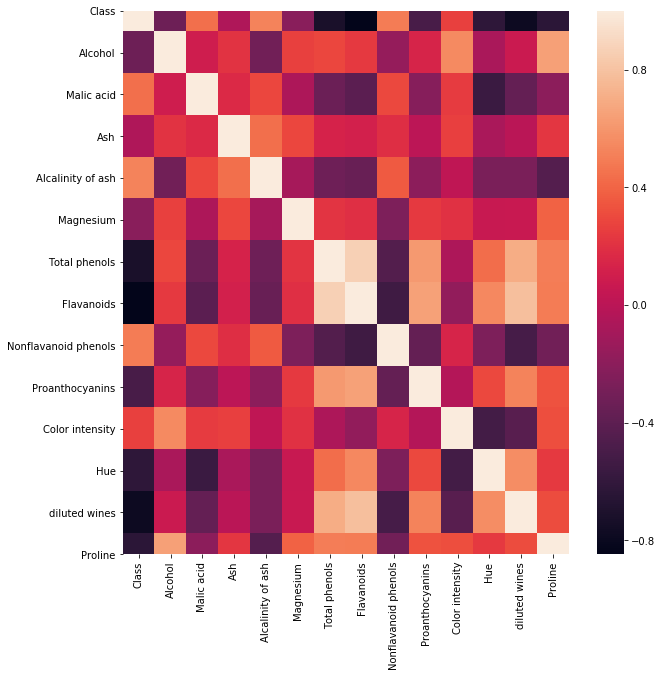

In [10]:
# heat map of corelation
corr_hmap=wn.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap)

Visualizing the data

Class                      AxesSubplot(0.125,0.749828;0.227941x0.130172)
Alcohol                 AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Malic acid              AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Ash                        AxesSubplot(0.125,0.593621;0.227941x0.130172)
Alcalinity of ash       AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Magnesium               AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Total phenols              AxesSubplot(0.125,0.437414;0.227941x0.130172)
Flavanoids              AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Nonflavanoid phenols    AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Proanthocyanins            AxesSubplot(0.125,0.281207;0.227941x0.130172)
Color intensity         AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Hue                     AxesSubplot(0.672059,0.281207;0.227941x0.130172)
diluted wines                 AxesSubplot(0.125,0.125;0.227941x0.130172)
Proline                    AxesSubplot(0.398529,0.1

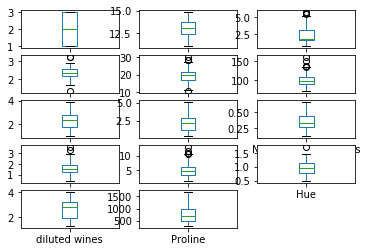

In [11]:
wn.plot(kind='box',subplots=True,layout=(5,3))

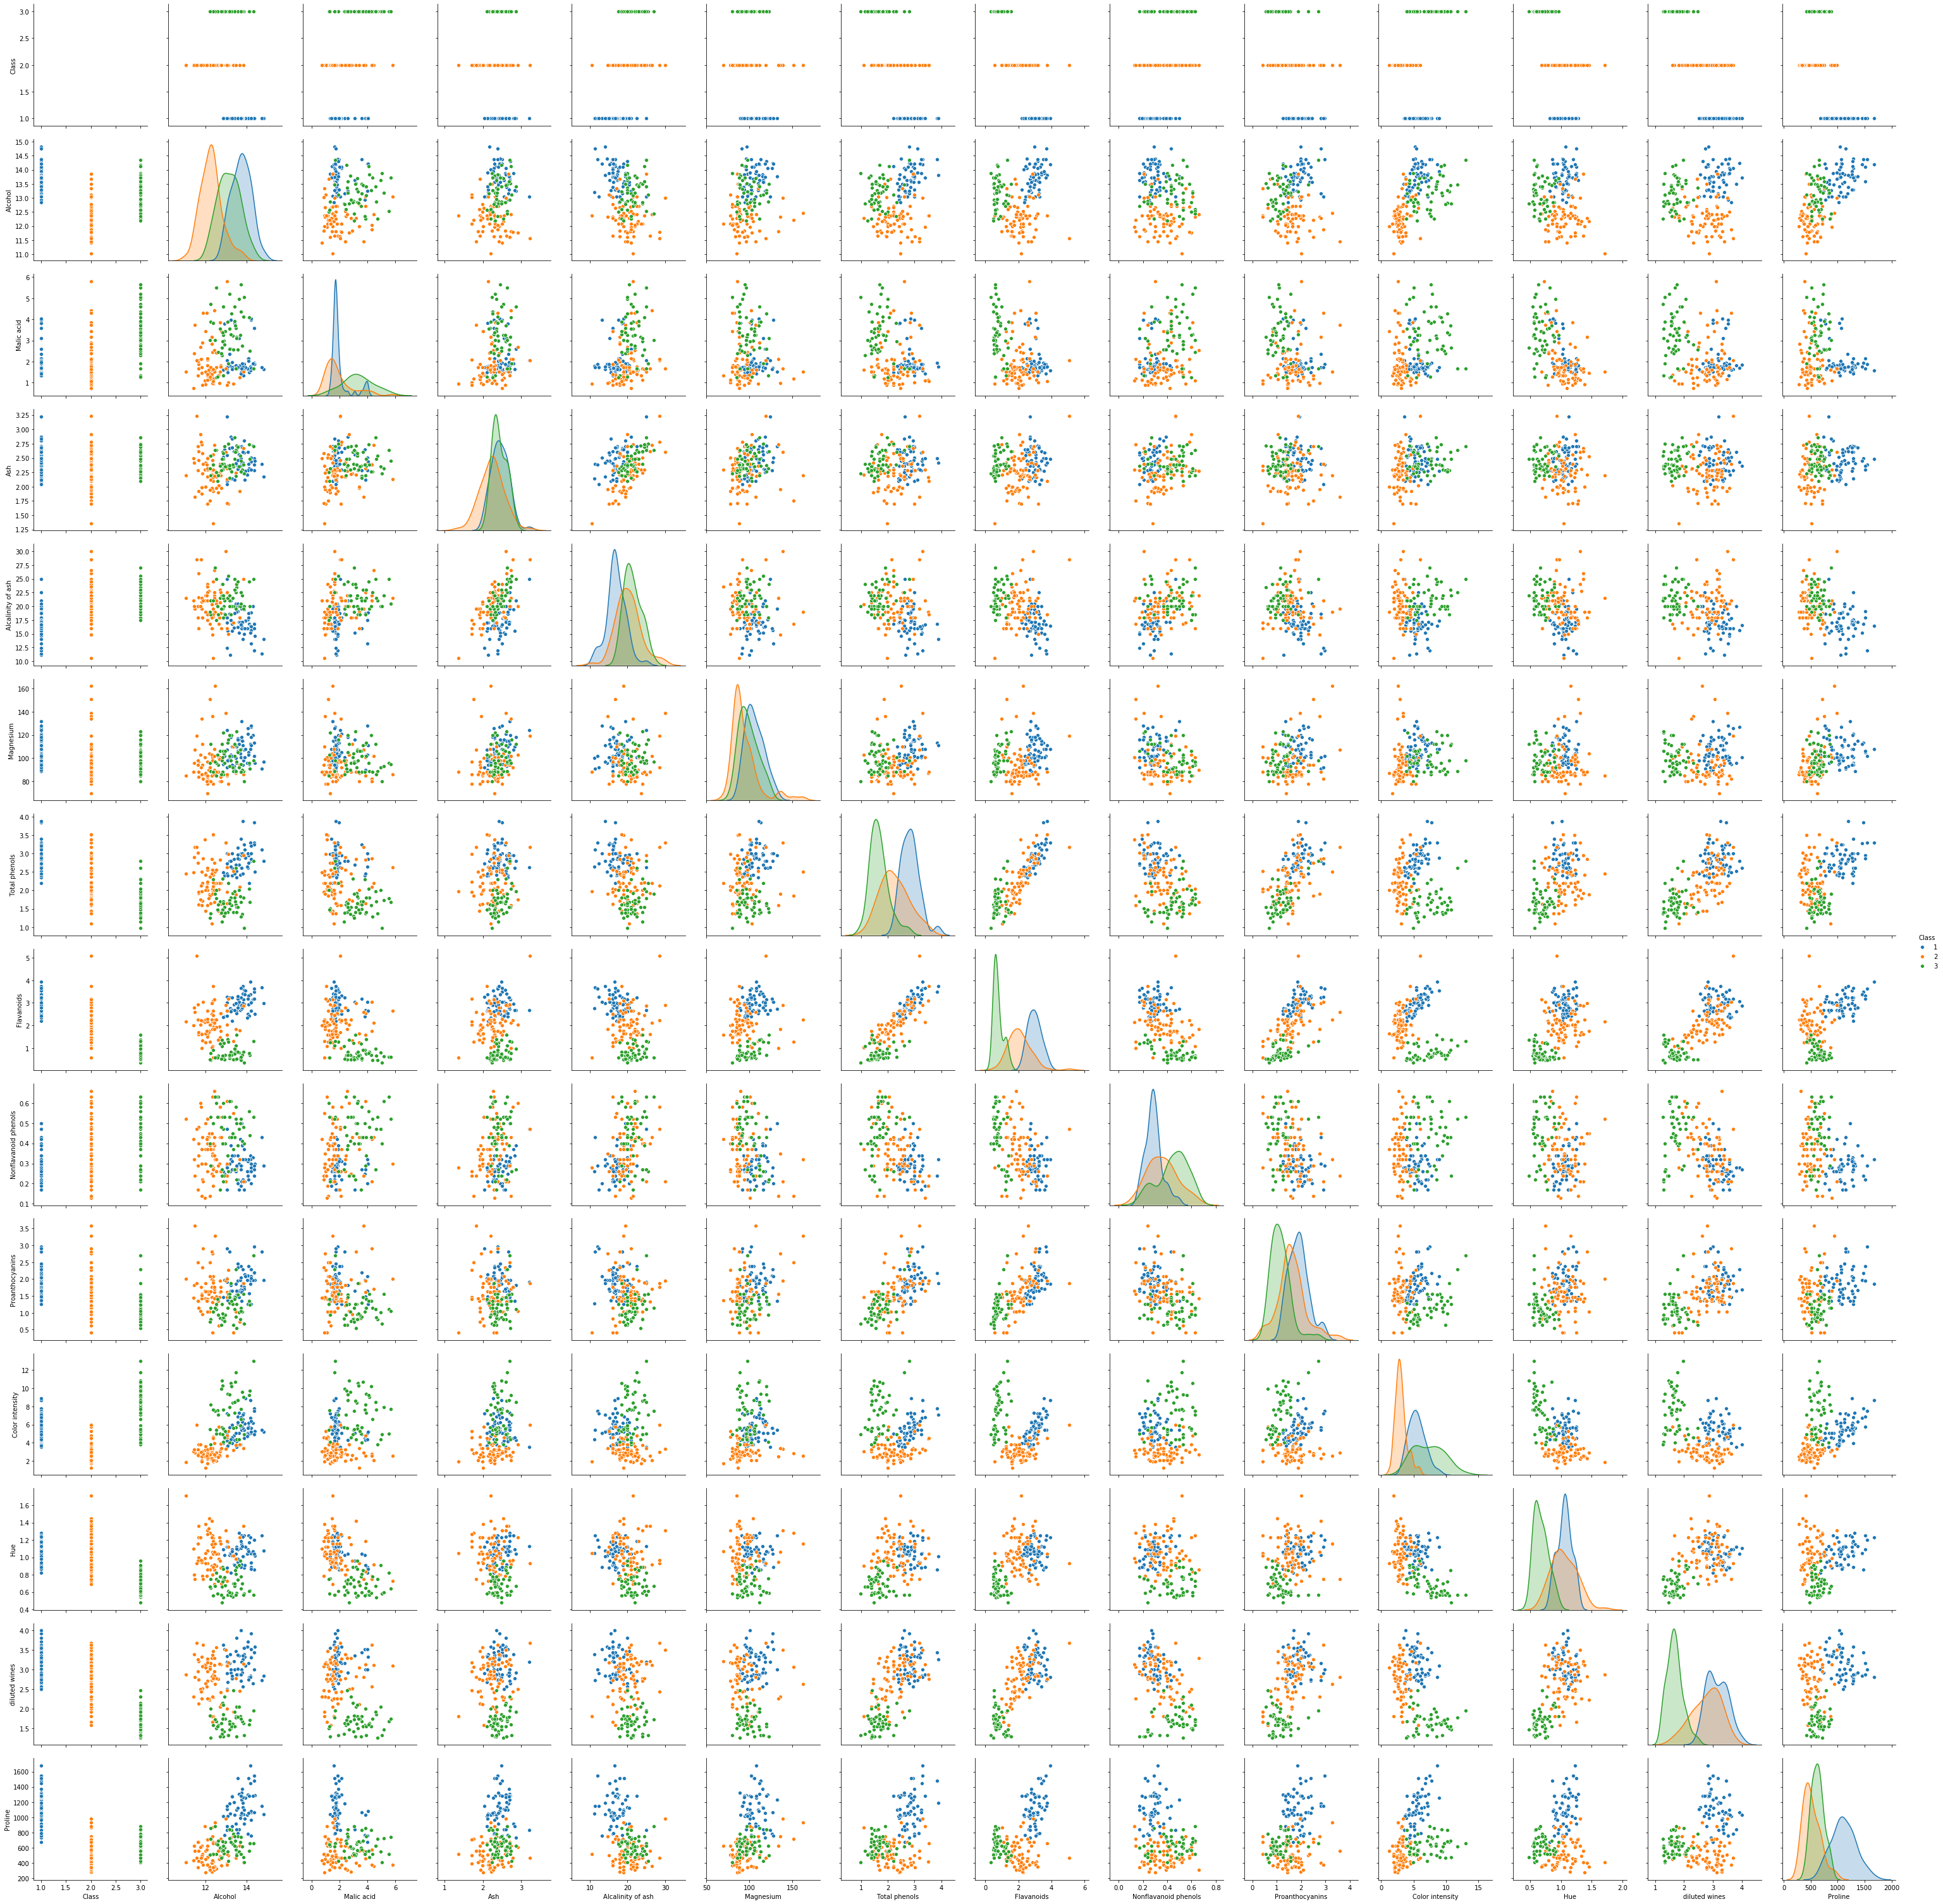

In [12]:
sns.pairplot(wn, hue='Class', height=3)

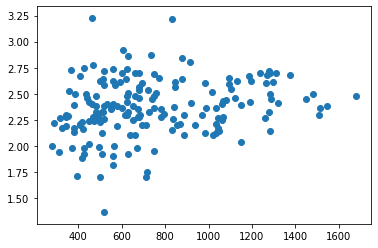

In [13]:
plt.scatter(x='Proline', y='Ash', data=wn)

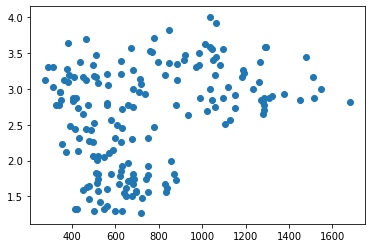

In [14]:
plt.scatter(x='Proline', y='diluted wines', data=wn)

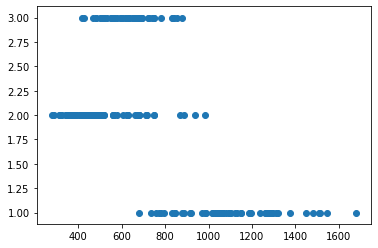

In [15]:
plt.scatter(x='Proline', y='Class', data=wn)

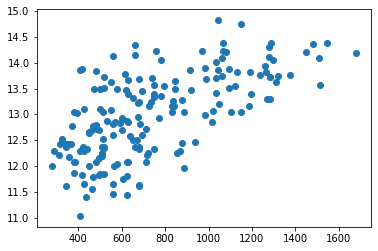

In [16]:
plt.scatter(x='Proline', y='Alcohol', data=wn)

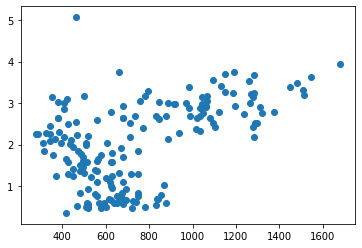

In [17]:
plt.scatter(x='Proline', y='Flavanoids', data=wn)

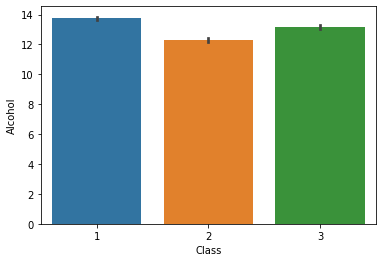

In [18]:
sns.barplot(x='Class', y='Alcohol', data=wn)

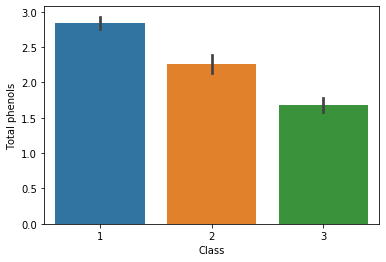

In [19]:
sns.barplot(x='Class', y='Total phenols', data=wn)

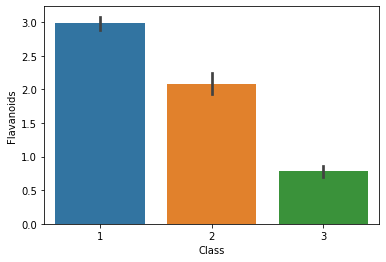

In [20]:
sns.barplot(x='Class', y='Flavanoids', data=wn)

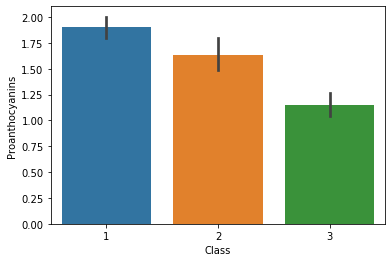

In [21]:
sns.barplot(x='Class', y='Proanthocyanins', data=wn)

In [22]:
#checking skewness
wn.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

In [23]:
#removing skewness
for col in wn.columns:
    if wn.skew().loc[col]>0.55:
        wn[col]=np.log1p(wn[col])
wn.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              0.529222
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               0.605723
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.097222
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.087930
dtype: float64

In [24]:
#removing outlires
z=abs(zscore(wn))
print(wn.shape)
wn1=wn.loc[(z<3).all(axis=1)]
print(wn1.shape)

(178, 14)
(170, 14)


In [25]:
# dividing dataset into input values 'x' and output value 'y'
x=wn1.iloc[:,1:]
x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,14.23,0.996949,2.43,15.6,4.852030,2.80,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669
1,13.20,1.022451,2.14,11.2,4.615121,2.65,2.76,0.26,1.28,1.682688,1.05,3.40,6.957497
2,13.16,1.211941,2.67,18.6,4.624973,2.80,3.24,0.30,2.81,1.899118,1.03,3.17,7.078342
3,14.37,1.081805,2.50,16.8,4.736198,3.85,3.49,0.24,2.18,2.174752,0.86,3.45,7.300473
4,13.24,1.278152,2.87,21.0,4.779123,2.80,2.69,0.39,1.82,1.671473,1.04,2.93,6.601230


In [26]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

In [27]:
y=wn1['Class']
y.sample(5)

60     2
165    3
87     2
18     1
107    2
Name: Class, dtype: int64

In [28]:
# function to find the maximum accuracy score against random state
def M_acc(model):
    max_acc_score=0
    for acc in range(10,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=acc)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
    
        accuracy=accuracy_score(test_y,pred)
        if accuracy>max_acc_score:
            max_acc_score=accuracy
            final_acc_state=acc
    
    return final_acc_state,max_acc_score

In [29]:
# function to print the various informaion related to a particular model
def mod(state,model_name):
    for m in model:      
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=state)
        m.fit(train_x,train_y)
        pred=m.predict(test_x)
        score=cross_val_score(m,train_x,train_y,cv=14,scoring='accuracy').mean()

        print(model_name,'model score is:',m.score(train_x,train_y),'\n')
        print('Accuracy score of',model_name,'model is : ',accuracy_score(test_y,pred),'\n')
        print('The mean of cross_val_score for the',model_name,'model is:',score,'\n')
        print('Confusion matrix for the',model_name,'model is : \n',confusion_matrix(test_y,pred),'\n')
        print('Classification report for the',model_name,'model is : \n',classification_report(test_y,pred),'\n')

In [30]:
# LogisticRegression model
lr=LogisticRegression()
print('Max accuracy score crossponding to random state is:',M_acc(lr))

final_acc_state,max_acc_score = M_acc(lr)
lr_acc=max_acc_score

Max accuracy score crossponding to random state is: (12, 1.0)


In [31]:
# GaussianNB model
gnb=GaussianNB()
print('Max accuracy score crossponding to random state is:',M_acc(gnb))

final_acc_state,max_acc_score = M_acc(gnb)
gnb_acc=max_acc_score

Max accuracy score crossponding to random state is: (11, 1.0)


In [32]:
# SVC model
svc=SVC()
print('Max accuracy score crossponding to random state is:',M_acc(svc))

final_acc_state,max_acc_score = M_acc(svc)
svc_acc=max_acc_score

Max accuracy score crossponding to random state is: (11, 1.0)


In [33]:
# DecisionTreeClassifier model
dtc=DecisionTreeClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(dtc))

final_acc_state,max_acc_score = M_acc(dtc)
dtc_acc=max_acc_score

Max accuracy score crossponding to random state is: (55, 1.0)


In [34]:
# RandomForestClassifier model
rfc=RandomForestClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(rfc))

final_acc_state,max_acc_score = M_acc(rfc)
rfc_acc=max_acc_score

Max accuracy score crossponding to random state is: (11, 1.0)


In [35]:
# GradientBoostingClassifier model
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate = 0.01, max_depth = 5)
print('Max accuracy score crossponding to random state is:',M_acc(gbc))

final_acc_state,max_acc_score = M_acc(gbc)
gbc_acc=max_acc_score

Max accuracy score crossponding to random state is: (17, 1.0)


In [36]:
# KNeighborsClassifier model
knc=KNeighborsClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(knc))

final_acc_state,max_acc_score = M_acc(knc)
knc_acc=max_acc_score

Max accuracy score crossponding to random state is: (14, 1.0)


In [37]:
# comparing the performances of all the model
model_performance = pd.DataFrame({
    'Model': ['RandomForestClassifier','SVC','GaussianNB','DecisionTreeClassifier','LogisticRegression','KNeighborsClassifier','GradientBoostingClassifier'],
    'Accuracy': [rfc_acc,svc_acc,gnb_acc,dtc_acc,lr_acc,knc_acc,gbc_acc]
})

model_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,RandomForestClassifier,1.0
1,SVC,1.0
2,GaussianNB,1.0
3,DecisionTreeClassifier,1.0
4,LogisticRegression,1.0
5,KNeighborsClassifier,1.0
6,GradientBoostingClassifier,1.0


In [38]:
model=[SVC()]
mod(state=11,model_name='SVC')

SVC model score is: 0.9926470588235294 

Accuracy score of SVC model is :  1.0 

The mean of cross_val_score for the SVC model is: 0.9790764790764791 

Confusion matrix for the SVC model is : 
 [[11  0  0]
 [ 0 16  0]
 [ 0  0  7]] 

Classification report for the SVC model is : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         7

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34
 



In [39]:
svc=SVC()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=11)
svc.fit(train_x,train_y)
pred=svc.predict(test_x)
score=cross_val_score(svc,train_x,train_y,cv=14,scoring='accuracy').mean()

print('SVC model score',svc.score(train_x,train_y),'\n')
print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('The mean of cross_val_score for the model is:',score,'\n')
print('Confusion matrix for the model is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

SVC model score 0.9926470588235294 

Accuracy score of model is :  1.0 

The mean of cross_val_score for the model is: 0.9790764790764791 

Confusion matrix for the model is : 
 [[11  0  0]
 [ 0 16  0]
 [ 0  0  7]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         7

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34
 



In [40]:
import joblib
# saving the model using pickle.
joblib.dump(svc,'svc_3. Wine Dataset.pkl')

['svc_3. Wine Dataset.pkl']